<a href="https://colab.research.google.com/github/ronsupreme/BaiTH3/blob/main/BAI_TH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [22]:
def load_data(folder):
    images = []
    labels = []
    img_shape = None

    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        if os.path.isfile(path) and not fname.startswith('.'):
            with Image.open(path) as img:
                img_array = np.array(img, dtype=np.float32)
                if img_shape is None:
                    img_shape = img_array.shape
                    print(f"  - Kích thước ảnh: {img_shape}")

                images.append(img_array.flatten())
                labels.append(fname.split('.')[0].split('_')[0])

    print(f"  - Đã đọc {len(images)} ảnh.")
    print(f"  - Dữ liệu sau khi flatten: {np.array(images).shape}")
    return np.array(images), np.array(labels), img_shape

#### Assignment 1 (4 scores): Implement PCA using Numpy.

In [23]:
def pca(X):
    print(f"  - Kích thước dữ liệu: {X.shape} (số ảnh x số pixel)")

    # Trừ mean để chuẩn hóa dữ liệu
    mean = np.mean(X, axis=0)

    X_centered = X - mean

    # Phân tích SVD
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    print(f"  - Ma trận Vt (eigenfaces) có kích thước: {Vt.shape}")

    # Tính explained variance
    explained_variance = (S ** 2) / (X.shape[0] - 1)
    print(f"\n🔹 Phương sai được giải thích (explained variance):\n{explained_variance[:5]} (top 5 giá trị)")

    return Vt, explained_variance, mean

#### Assignment 2 (4 scores):
- Reading the training images.
- Approximating the Principle Space having **20 dimensions**.
- Visualize the base of this Principle Space.

In [24]:
def visualize_eigenfaces(components, img_shape, n_components=20):
    print(f"\n🎨 Trực quan hóa {n_components} eigenfaces đầu tiên...")
    plt.figure(figsize=(10, 8))
    for i in range(n_components):
        plt.subplot(4, 5, i+1)
        eigenface = components[i].reshape(img_shape)
        eigenface = (eigenface - eigenface.min()) / (eigenface.max() - eigenface.min())  # Chuẩn hóa [0, 1]
        plt.imshow(eigenface, cmap='gray')
        plt.title(f"PC {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#### Assignment 3 (2 scores):
- Assign persons to the face images in testing data.
- Evaluate the accuracy of this face recognition system.

In [25]:
def predict(X_train_pca, y_train, X_test_pca):
    distances = cdist(X_test_pca, X_train_pca, 'euclidean')
    min_indices = np.argmin(distances, axis=1)
    pred_labels = y_train[min_indices]
    return pred_labels

  - Kích thước ảnh: (243, 320)
  - Đã đọc 165 ảnh.
  - Dữ liệu sau khi flatten: (165, 77760)
  - Kích thước dữ liệu: (165, 77760) (số ảnh x số pixel)
  - Ma trận Vt (eigenfaces) có kích thước: (165, 77760)

🔹 Phương sai được giải thích (explained variance):
[1.0481443e+08 4.8191704e+07 3.0438640e+07 2.5549948e+07 1.6181329e+07] (top 5 giá trị)

🎨 Trực quan hóa 20 eigenfaces đầu tiên...


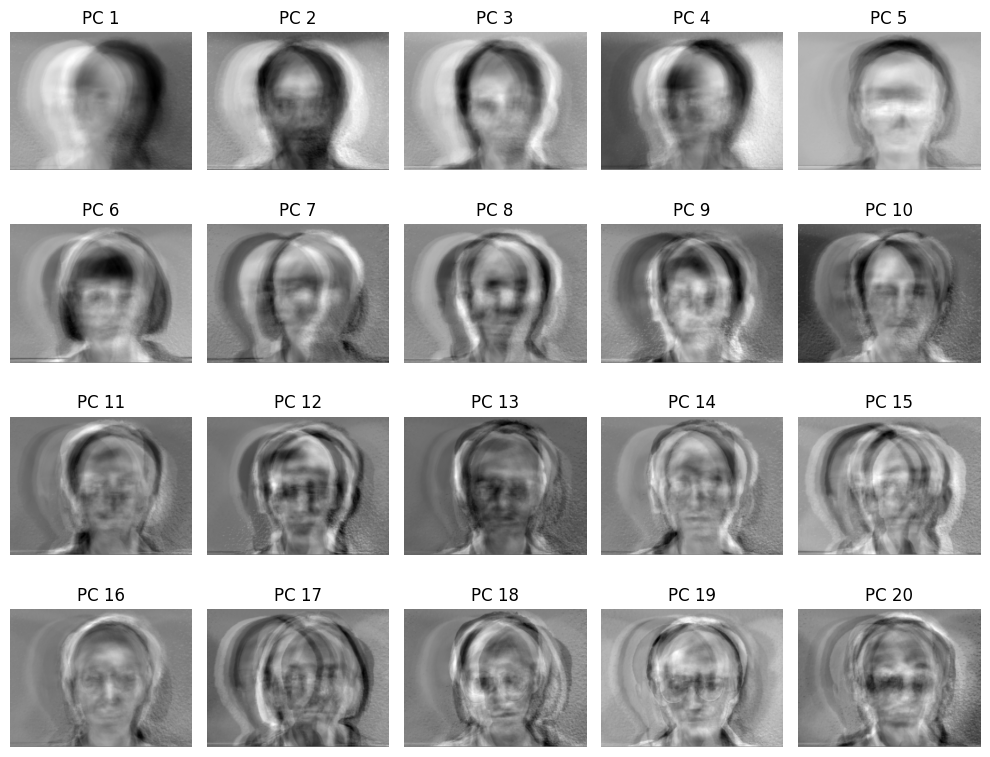

  - Kích thước ảnh: (243, 320)
  - Đã đọc 165 ảnh.
  - Dữ liệu sau khi flatten: (165, 77760)

 Độ chính xác = 100.00%


In [26]:
if __name__ == "__main__":

    # 1. Đọc dữ liệu huấn luyện
    train_folder = "/content/yalefaces"
    X_train, y_train, img_shape = load_data(train_folder)

    # 2. Áp dụng PCA để trích xuất eigenfaces
    Vt, explained_variance, mean = pca(X_train)
    components = Vt[:20]  # Lấy 20 thành phần chính

    # 3. Trực quan hóa eigenfaces
    visualize_eigenfaces(components, img_shape)

    # 4. Đọc dữ liệu kiểm tra và dự đoán (Trong dataset không tìm thấy dữ liệu test)
    test_folder = "/content/yalefaces"
    X_test, y_test, _ = load_data(test_folder)

    # Chiếu dữ liệu kiểm tra vào không gian PCA
    X_test_centered = X_test - mean
    X_test_pca = X_test_centered @ Vt[:20].T

    # Chuẩn bị dữ liệu huấn luyện trong không gian PCA
    X_train_centered = X_train - mean
    X_train_pca = X_train_centered @ Vt[:20].T

    # Dự đoán và đánh giá độ chính xác
    pred_labels = predict(X_train_pca, y_train, X_test_pca)
    accuracy = np.mean(pred_labels == y_test)
    print(f"\n Độ chính xác = {accuracy * 100:.2f}%")